# Data Visualization on Kaggle 2020
## by Baiyan Ren

## Preliminary Wrangling

> This dataset is the annual survey of Kaggle on data science and machine learning in 2020. It collects the information of practitioners in a comprehensive way, from age, gender to prefered machine learning tools. I'll explore the dataset to understand the salary of data science and machine learning practitioners.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [52]:
cmap = sns.choose_cubehelix_palette()

interactive(children=(IntSlider(value=9, description='n_colors', max=16, min=2), FloatSlider(value=0.0, descri…

In [2]:
survey_2020 = pd.read_csv('kaggle_survey_2020_responses.csv', low_memory=False, skiprows=[1])

In [3]:
survey_2020.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
1,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,78,30-34,Man,Japan,Master’s degree,Software Engineer,3-5 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
survey_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20036 entries, 0 to 20035
Columns: 355 entries, Time from Start to Finish (seconds) to Q35_B_OTHER
dtypes: int64(1), object(354)
memory usage: 54.3+ MB


In [4]:
survey_2020.isna().sum()

Time from Start to Finish (seconds)        0
Q1                                         0
Q2                                         0
Q3                                         0
Q4                                       467
                                       ...  
Q35_B_Part_7                           19556
Q35_B_Part_8                           19190
Q35_B_Part_9                           19517
Q35_B_Part_10                          16954
Q35_B_OTHER                            19785
Length: 355, dtype: int64

### What is the structure of your dataset?

> It has 20036 rows and 355 colomns

### What is/are the main feature(s) of interest in your dataset?

> salary

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> columns containing the information of education level and coding experience

## Univariate Exploration


In [4]:
columns = {'Q1': 'Age', 
           'Q2': 'Gender', 
           'Q3': 'Country', 
           'Q4': 'Education', 
           'Q5': 'Title', 
           'Q6': 'Coding_exp', 
           'Q8': 'Recommended_language', 
           'Q15': 'ML_exp',
           'Q20': 'Company_size', 
           'Q24': 'Salary'}
survey_2020.rename(columns=columns, inplace=True)

In [5]:
Education = ['No formal education past high school', 
             'Some college/university study without earning a bachelor’s degree', 
             'Bachelor’s degree', 
             'Master’s degree', 
             'Doctoral degree', 
             'Professional degree',
             'I prefer not to answer']
edu = pd.api.types.CategoricalDtype(categories=Education, ordered=True)
survey_2020['Education'] = survey_2020['Education'].astype(edu)

In [40]:
coding = ['I have never written code', 
          '< 1 years', 
          '1-2 years', 
          '3-5 years', 
          '5-10 years', 
          '10-20 years', 
          '20+ years']
cod = pd.api.types.CategoricalDtype(categories=coding, ordered=True)
survey_2020['Coding_exp'] = survey_2020['Coding_exp'].astype(cod)

In [6]:
survey_2020_doct = survey_2020.query('Education == "Doctoral degree"').copy()
survey_2020_other = survey_2020.query('Education != "Doctoral degree"').copy()

In [11]:
edu_count = survey_2020.groupby('Education').size()
total = edu_count.sum()
edu_prop = edu_count/total*100
edu_prop

Education
No formal education past high school                                  1.226430
Some college/university study without earning a bachelor’s degree     5.580254
Bachelor’s degree                                                    35.658439
Master’s degree                                                      40.160458
Doctoral degree                                                      11.763504
Professional degree                                                   3.571976
I prefer not to answer                                                2.038939
dtype: float64

In [8]:
salary = ['$0-999', '1,000-1,999', '2,000-2,999', '3,000-3,999', '4,000-4,999', '5,000-7,499', '7,500-9,999', 
          '10,000-14,999', '15,000-19,999', '20,000-24,999', '25,000-29,999', '30,000-39,999', '40,000-49,999',
          '50,000-59,999', '60,000-69,999', '70,000-79,999', '80,000-89,999', '90,000-99,999', '100,000-124,999',
          '125,000-149,999', '150,000-199,999', '200,000-249,999', '250,000-299,999', '300,000-500,000', '> $500,000']
salary_total = survey_2020.groupby('Salary').size()[salary]
salary_prop_total = salary_total/salary_total.sum()*100

In [15]:
coding = ['I have never written code', '< 1 years', '1-2 years', '3-5 years', '5-10 years', '10-20 years', '20+ years']
coding_count = survey_2020.groupby('Coding_exp').size()[coding]
coding_prop = coding_count/coding_count.sum()*100
coding_prop

Coding_exp
I have never written code     5.878661
< 1 years                    17.327406
1-2 years                    23.561715
3-5 years                    23.776151
5-10 years                   13.347280
10-20 years                   9.157950
20+ years                     6.950837
dtype: float64

In [41]:
coding = ['I have never written code', '< 1 years', '1-2 years', '3-5 years', '5-10 years', '10-20 years', '20+ years']
coding_salary = survey_2020.groupby(['Coding_exp', 'Salary']).size().unstack()[salary].reindex(coding[::-1]).fillna(0).astype(int)

In [42]:
coding_edu = survey_2020.groupby(['Coding_exp', 'Education']).size().unstack().reindex(coding[::-1]).fillna(0).astype(int)

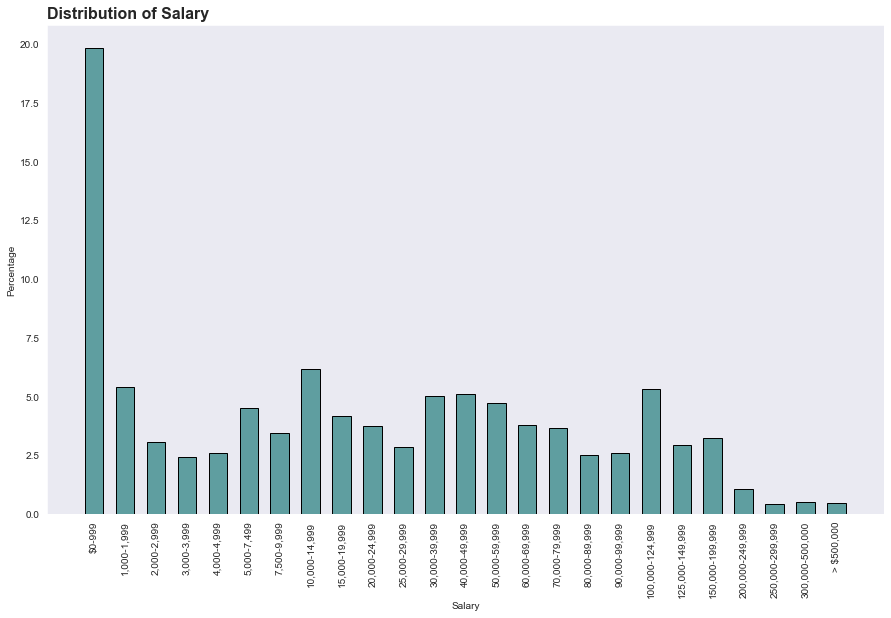

In [9]:
sns.set_style('dark')
fig, ax = plt.subplots(figsize=[15, 9])
ax.bar(salary_total.index, salary_prop_total, color='cadetblue', edgecolor=(0, 0, 0), width=0.6, label='All')
plt.xticks(rotation=90)
plt.xlabel('Salary')
plt.ylabel('Percentage')
plt.title('Distribution of Salary', fontsize=16, fontweight='bold', loc='left');

Majority of the respondents have annual salary lower than $1000. 

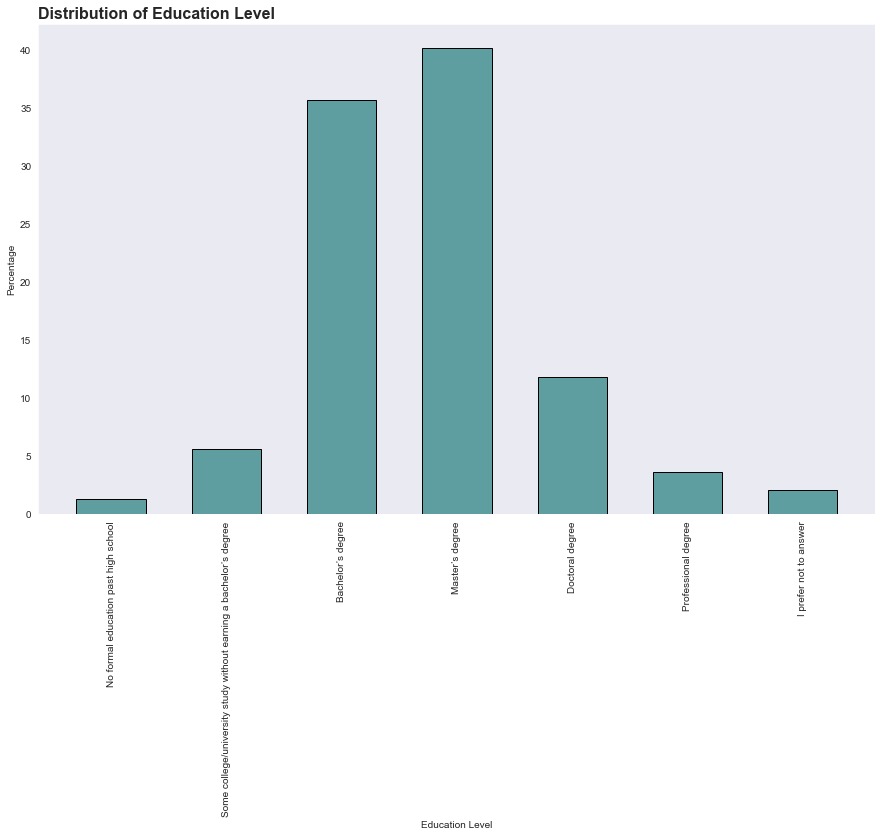

In [12]:
fig, ax = plt.subplots(figsize=[15, 9])
ax.bar(edu_prop.index, edu_prop, color='cadetblue', edgecolor=(0, 0, 0), width=0.6, label='All')
plt.xticks(rotation=90)
plt.xlabel('Education Level')
plt.ylabel('Percentage')
plt.title('Distribution of Education Level', fontsize=16, fontweight='bold', loc='left');

Most of the respondents have Bachelor or Master's degree.

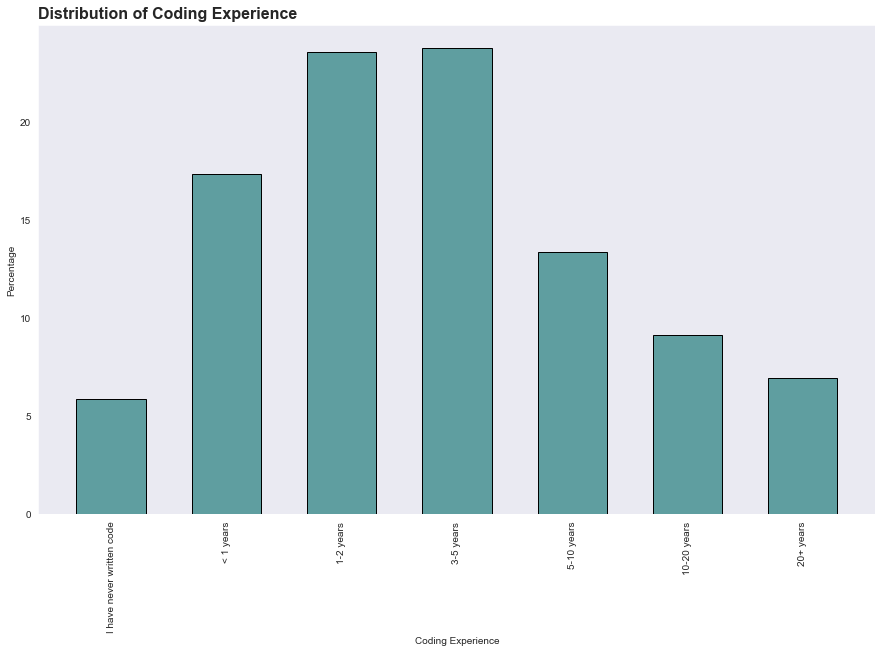

In [16]:
fig, ax = plt.subplots(figsize=[15, 9])
ax.bar(coding_prop.index, coding_prop, color='cadetblue', edgecolor=(0, 0, 0), width=0.6, label='All')
plt.xticks(rotation=90)
plt.xlabel('Coding Experience')
plt.ylabel('Percentage')
plt.title('Distribution of Coding Experience', fontsize=16, fontweight='bold', loc='left');

Most of the respondents have 1-5 years coding experience

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Majority of the respondents have annual salary lower than \\$1000, which is uncommon in US. The reason might be that this is collected from worldwide, the salary is different in developed and developing country.

> The most common education level is Bachelor and Master's degree.

> Most of the respondents have 1-5 years coding experience.

Next, I'll explore the relationship of these variables.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> No

## Bivariate Exploration


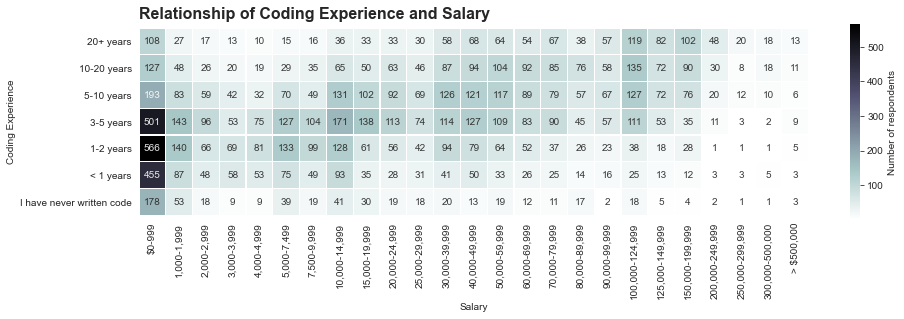

In [11]:
fig, ax = plt.subplots(figsize=[15, 9])

sns.heatmap(data=coding_salary,
                  cmap='bone_r', 
                  linewidths=0.2, 
                  square=True, 
                  annot=True, 
                  fmt = 'd', 
                  annot_kws={'alpha': 0.9},
                  cbar_kws={'shrink': 0.4, 'label': 'Number of respondents'})
plt.xlabel('Salary')

plt.ylabel('Coding Experience')

plt.title('Relationship of Coding Experience and Salary', fontsize=16, fontweight='bold', loc='left', va='bottom');

There is a positive correlation between coding experience and salary.

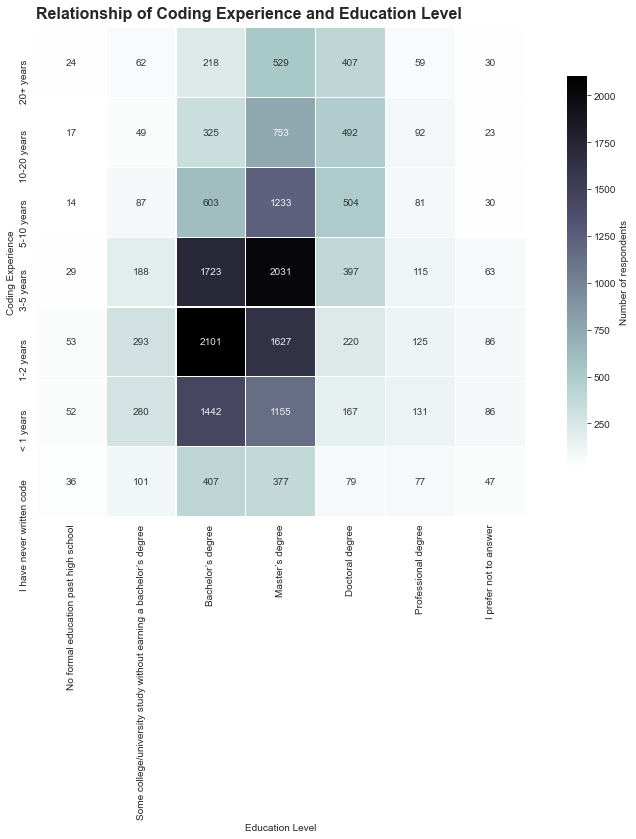

In [26]:
fig, ax = plt.subplots(figsize=[15, 9])

sns.heatmap(data=coding_edu,
                  cmap='bone_r', 
                  linewidths=0.2, 
                  square=True, 
                  annot=True, 
                  fmt = 'd', 
                  annot_kws={'alpha': 0.9},
                  cbar_kws={'shrink': 0.8, 'label': 'Number of respondents'})
plt.xlabel('Education Level')

plt.ylabel('Coding Experience')

plt.title('Relationship of Coding Experience and Education Level', fontsize=16, fontweight='bold', loc='left', va='bottom');

The coding experience increases with the education level.

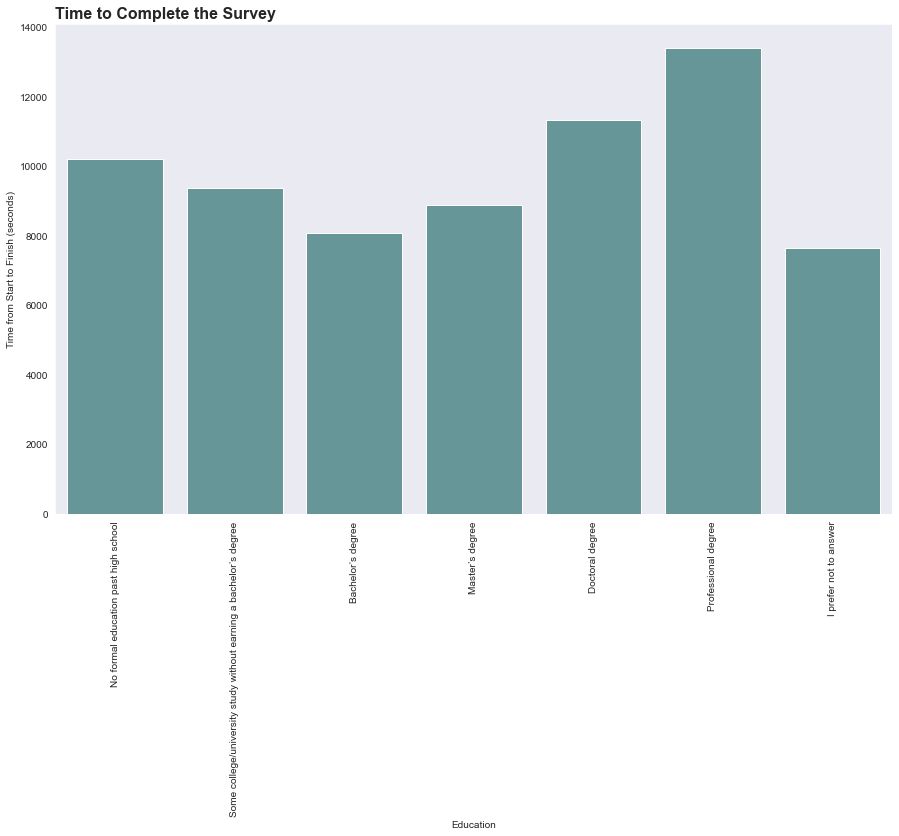

In [33]:
fig, ax = plt.subplots(figsize=[15, 9])
sns.barplot(data=survey_2020, x='Education', y='Time from Start to Finish (seconds)', ci=None, color='cadetblue')
plt.xticks(rotation=90)
plt.xlabel('Education')
plt.title('Time to Complete the Survey', fontsize=16, fontweight='bold', loc='left');

Interestingly, the period time to complete the survey is different in different education levels. Respondents with Bachelor's degree have the shortest, while respondents with Professional degree have the longest.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Although most of the respondents have salary lower than \\$1000, there is a positive correlation between salary and coding experience.

> Coding experience increases with education level.

> The interesting part is, the period of time to complete the survey is different among education levels.

Next, I'll explore further into these variables.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> No

## Multivariate Exploration


In [18]:
survey_2020_bs = survey_2020.query('Education == "Bachelor’s degree"').copy()
survey_2020_ms = survey_2020.query('Education == "Master’s degree"').copy()

In [19]:
coding_bs = survey_2020_bs.groupby(['Coding_exp', 'Salary']).size().unstack()[salary].reindex(coding[::-1]).fillna(0).astype(int)
coding_ms = survey_2020_ms.groupby(['Coding_exp', 'Salary']).size().unstack()[salary].reindex(coding[::-1]).fillna(0).astype(int)
coding_doct = survey_2020_doct.groupby(['Coding_exp', 'Salary']).size().unstack()[salary].reindex(coding[::-1]).fillna(0).astype(int)

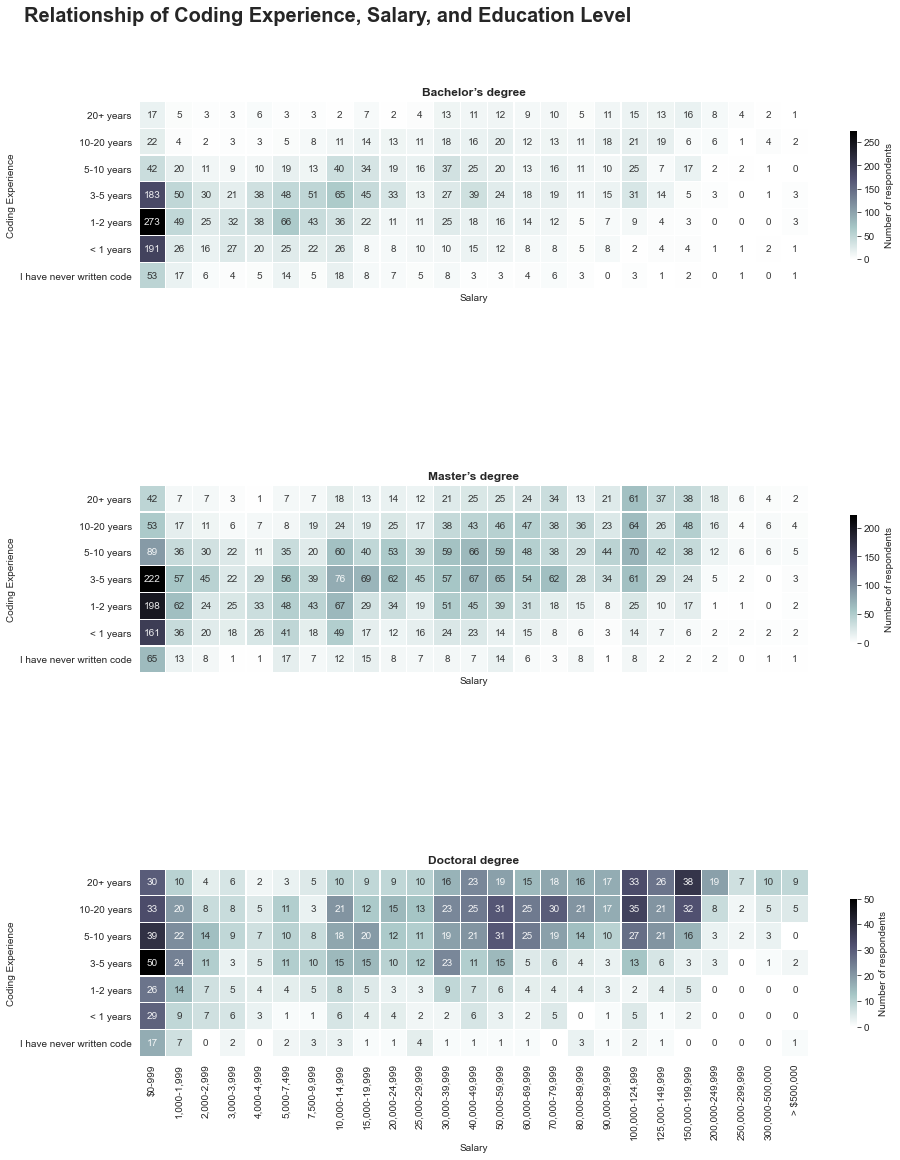

In [20]:
fig, axes = plt.subplots(3, 1, figsize=[15, 20], sharex=True, sharey=True)

ax1 = sns.heatmap(data=coding_bs,
                  cmap='bone_r', 
                  linewidths=0.2, 
                  square=True, 
                  annot=True, 
                  fmt = 'd', 
                  annot_kws={'alpha': 0.9},
                  cbar_kws={'shrink': 0.4, 'label': 'Number of respondents'},
                  ax=axes[0],
                  label='Bachelor’s degree')
ax2 = sns.heatmap(data=coding_ms,
                  cmap='bone_r', 
                  linewidths=0.2, 
                  square=True, 
                  annot=True, 
                  fmt = 'd', 
                  annot_kws={'alpha': 0.9},
                  cbar_kws={'shrink': 0.4, 'label': 'Number of respondents'},
                  ax=axes[1],
                  label='Master’s degree')
ax3 = sns.heatmap(data=coding_doct,
                  cmap='bone_r', 
                  linewidths=0.2, 
                  square=True, 
                  annot=True, 
                  fmt = 'd', 
                  annot_kws={'alpha': 0.9},
                  cbar_kws={'shrink': 0.4, 'label': 'Number of respondents'},
                  ax=axes[2],
                  label='Doctoral degree')
fontdict={'fontsize': 12,
          'fontweight': 'bold'}
ax1.set_title('Bachelor’s degree', fontdict=fontdict)
ax2.set_title('Master’s degree', fontdict=fontdict)
ax3.set_title('Doctoral degree', fontdict=fontdict)
for ax in [ax1, ax2, ax3]:
    ax.set_ylabel('Coding Experience')

fig.suptitle('Relationship of Coding Experience, Salary, and Education Level', x=0.3, y=0.9, size=20, weight='bold');

There are positive correlation between salary and coding experience, salary and education levels. With the same coding experience, respondents having higher education level earn more salary.

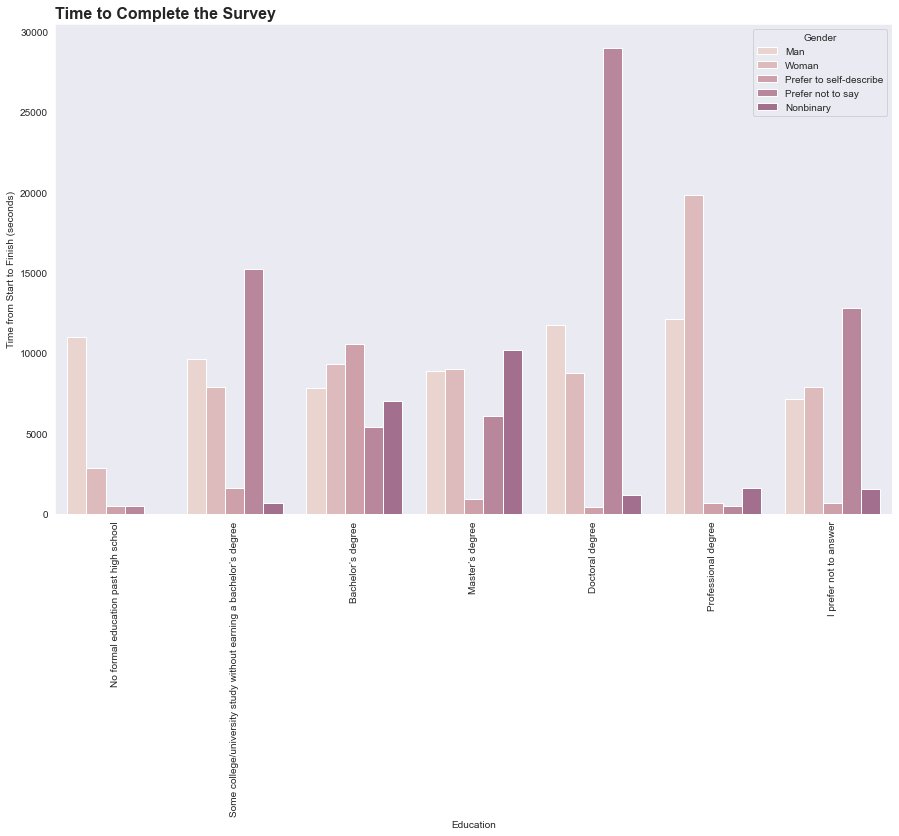

In [53]:
fig, ax = plt.subplots(figsize=[15, 9])
sns.barplot(data=survey_2020, x='Education', y='Time from Start to Finish (seconds)', hue='Gender', ci=None, palette=cmap)
plt.xticks(rotation=90)
plt.xlabel('Education')
plt.title('Time to Complete the Survey', fontsize=16, fontweight='bold', loc='left');

The period of time to complete the survey is more even among genders for respondents with Bachelor's degree. Compareing female and male, their largest difference is observed in the group of respondents with Professional degree.

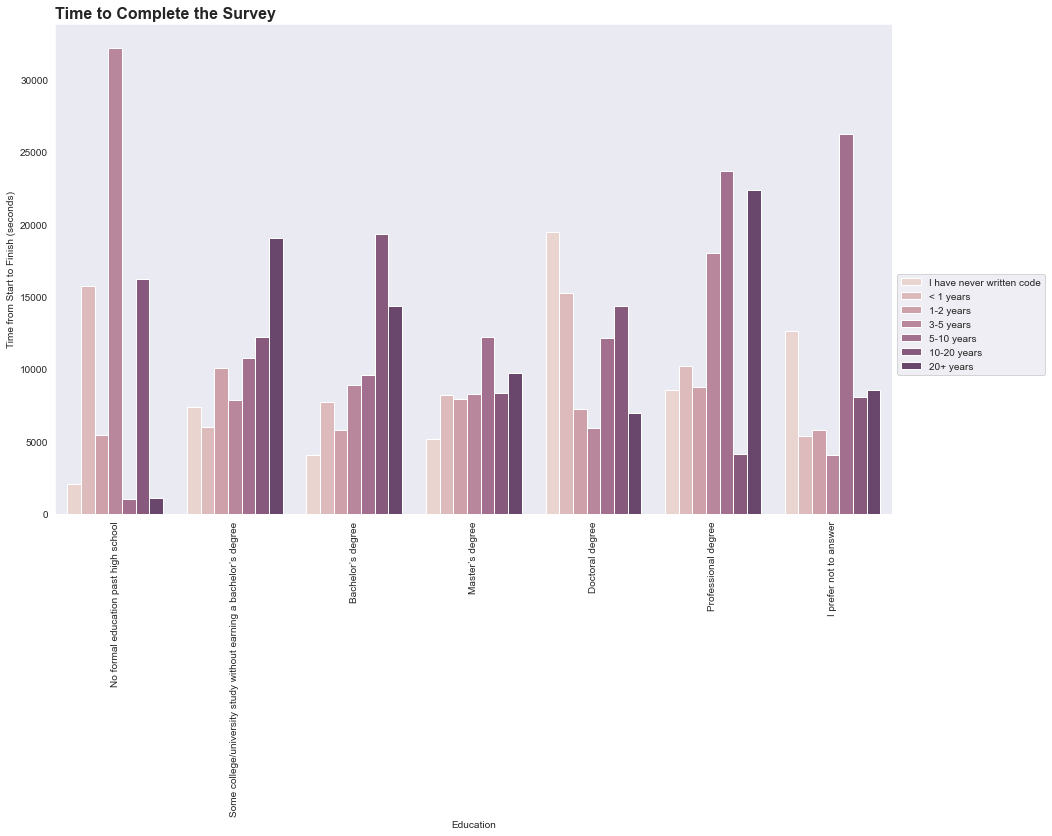

In [56]:
fig, ax = plt.subplots(figsize=[15, 9])
sns.barplot(data=survey_2020, x='Education', y='Time from Start to Finish (seconds)', hue='Coding_exp', ci=None, palette=cmap)
plt.xticks(rotation=90)
plt.xlabel('Education')
plt.legend(bbox_to_anchor=[1, 0.5, 0, 0])
plt.title('Time to Complete the Survey', fontsize=16, fontweight='bold', loc='left');

For the majority of respondents with coding experience between 1 to 5 years, the period of time to complete the survey decrease with the increasing of education level.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>  There is positive correlation between salary and coding experience in all three education levels. In addition, with the same coding experience, the salary of respondents with doctoral degree is higher than those with Master's degree and Bachelor's degree.

> For the time to complete the survey, there are differences among education level, gender and coding experience.
### Were there any interesting or surprising interactions between features?

> The proportion of experienced respondents increases with education level.